In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
blank = 0.533
control = np.array([1.88, 2.057])
control_b = np.array([0.823, 0.82])

sixty_s = np.array([2.938, 3.26])
sixty_s_b =  np.array([1.063, 0.994])

blank_composite = np.array([0.531, 0.535]) - blank
control_composite = np.hstack([control - blank, 5*(control_b - blank)])
sixty_s_composite = np.hstack([sixty_s - blank, 5*(sixty_s_b - blank)])
pos_control = np.array([4.665, 5.272]) - blank

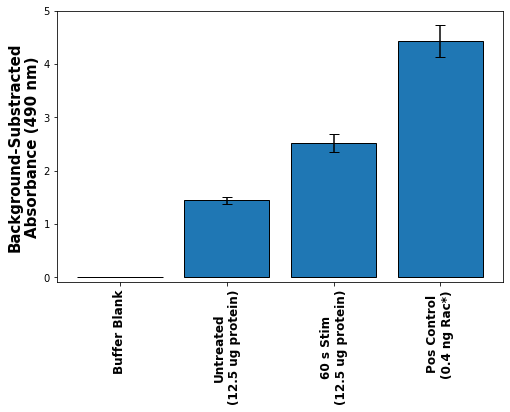

In [3]:
H = np.array([np.average(blank_composite), np.average(control_composite), np.average(sixty_s_composite), np.average(pos_control)])
S = np.array([np.std(blank_composite), np.std(control_composite), np.std(sixty_s_composite), np.std(pos_control)])

plt.figure(figsize = (8, 5), facecolor = 'w')
plt.bar([0, 1, 2, 3], H, ec = 'k', yerr = S, capsize = 5)
plt.xticks([0, 1, 2, 3], ['Buffer Blank', 'Untreated\n(12.5 ug protein)', '60 s Stim\n(12.5 ug protein)', 'Pos Control\n(0.4 ng Rac*)'], rotation = 90,  fontweight = 'bold', fontsize = 12)
plt.ylim(-0.1, 5)
plt.ylabel('Background-Substracted\nAbsorbance (490 nm)', fontweight = 'bold', fontsize = 15)
plt.show()

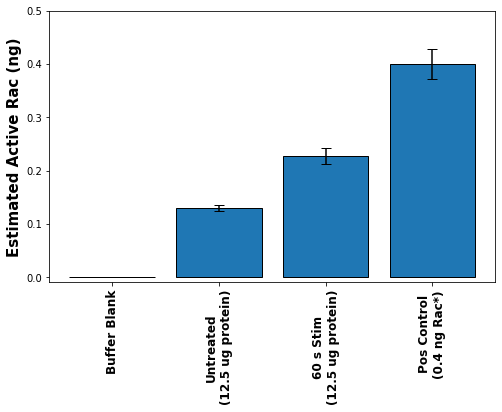

In [4]:
plt.figure(figsize = (8, 5), facecolor = 'w')
plt.bar([0, 1, 2, 3], 0.4 * H/H[-1], ec = 'k', yerr = 0.4 * S/H[-1], capsize = 5)
plt.xticks([0, 1, 2, 3], ['Buffer Blank', 'Untreated\n(12.5 ug protein)', '60 s Stim\n(12.5 ug protein)', 'Pos Control\n(0.4 ng Rac*)'], rotation = 90,  fontweight = 'bold', fontsize = 12)
plt.ylim(-0.01, 0.5)
plt.ylabel('Estimated Active Rac (ng)', fontweight = 'bold', fontsize = 15)
plt.show()

In [5]:
0.4 * H/H[-1]

array([0.        , 0.12977116, 0.22741517, 0.4       ])

In [6]:
0.22741517/0.12977116

1.7524322815639468

In [7]:
0.22741517/12.5

0.0181932136

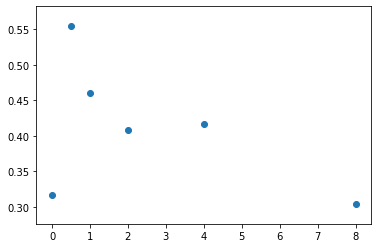

In [8]:
#nov 4, 2021 3:50 pm
A = [0.148, 0.147]
B = [0.404, 0.416]
C = [0.629, 0.585]
D = [0.528, 0.529]
E = [0.480, 0.492]
F = [0.516, 0.469]
G = [0.420, 0.379]
H = [0.952, 1.001]

tvals = [0, 0.5, 1, 2, 4, 8]
yvals = []
svals = []
for i in [B, C, D, E, F, G]:
    yvals.append((np.average(i) - np.average(A))/(np.average(H) - np.average(A)))
    svals.append((np.std(i))/(np.average(H) - np.average(A)))
plt.scatter(tvals, yvals)

rac_control_1 = yvals

In [9]:
for i in svals:
    print(i/yvals[0])

0.022857142857142767
0.08380952380952388
0.0019047619047619063
0.022857142857142874
0.08952380952380959
0.07809523809523805


In [10]:
rac_control_1

[0.3166465621230399,
 0.5542822677925212,
 0.4595898673100121,
 0.40832328106151994,
 0.4161640530759952,
 0.30398069963811825]

(-20, 500)

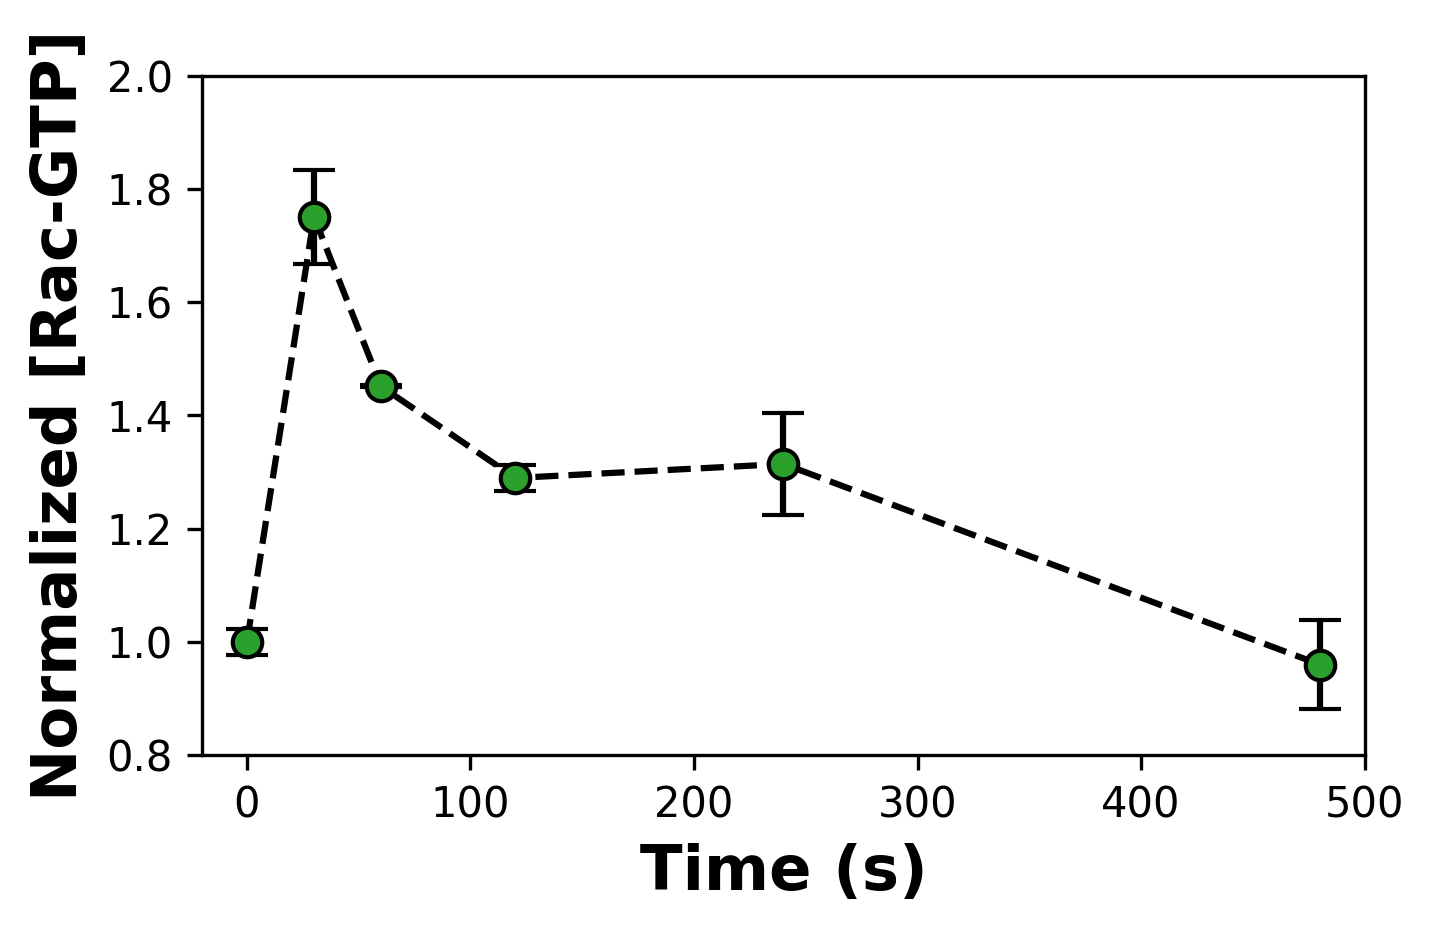

In [11]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.scatter(60*np.array(tvals), rac_control_1/rac_control_1[0], s = 50, ec = 'k', zorder = 2, facecolor = 'C2')
plt.errorbar(60*np.array(tvals), rac_control_1/rac_control_1[0], yerr = svals/rac_control_1[0], zorder = 1, color = 'k', capsize = 5, ls = '--')
plt.xlabel('Time (s)', fontweight = 'bold', fontsize = 15)
plt.ylabel('Normalized [Rac-GTP]', fontweight = 'bold', fontsize = 15)
plt.ylim(0.8, 2)
plt.xlim(-20, 500)
#plt.scatter(tvals, cdc42_inhib)